✅ Dataset loaded successfully!

Displaying your sales data plot...


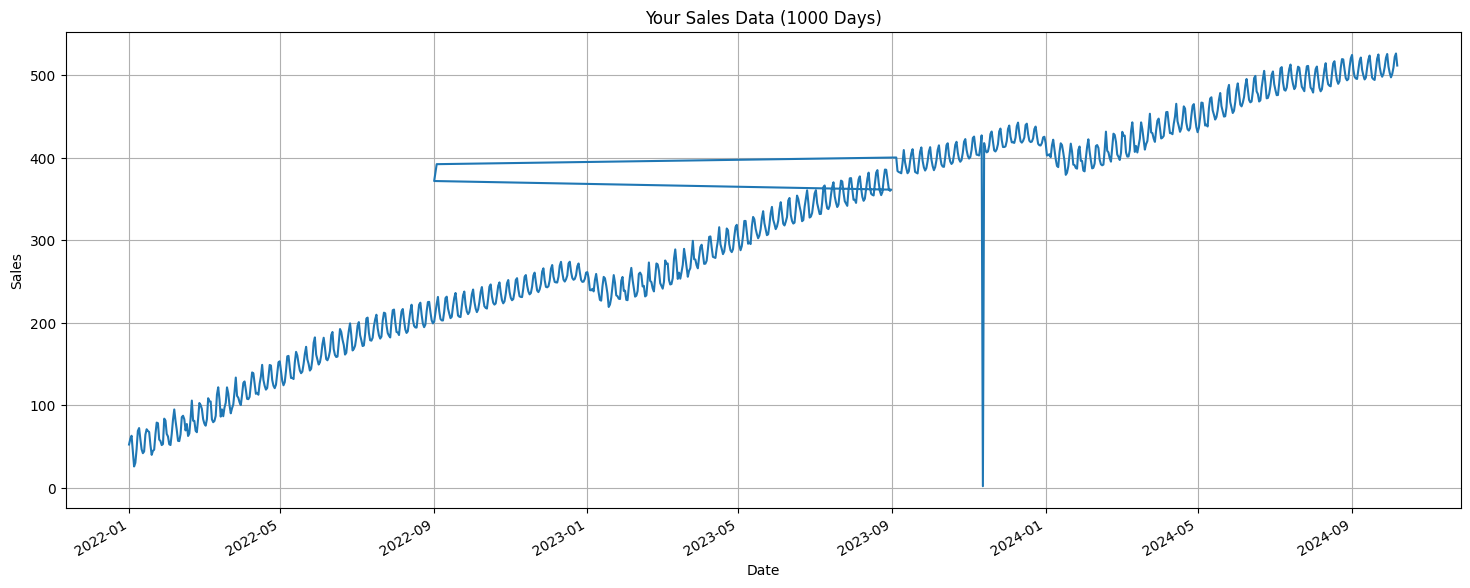


Data split into training and testing sets:
Training data points: 808
Testing data points: 202

Training the ARIMA model... (This may take a moment)
✅ Model training complete!

Making predictions on the test data...

--- Model Performance Evaluation ---
Root Mean Squared Error (RMSE): 61.02
Mean Absolute Error (MAE): 54.18
Mean Absolute Percentage Error (MAPE): 11.01%
------------------------------------

Displaying the forecast visualization...


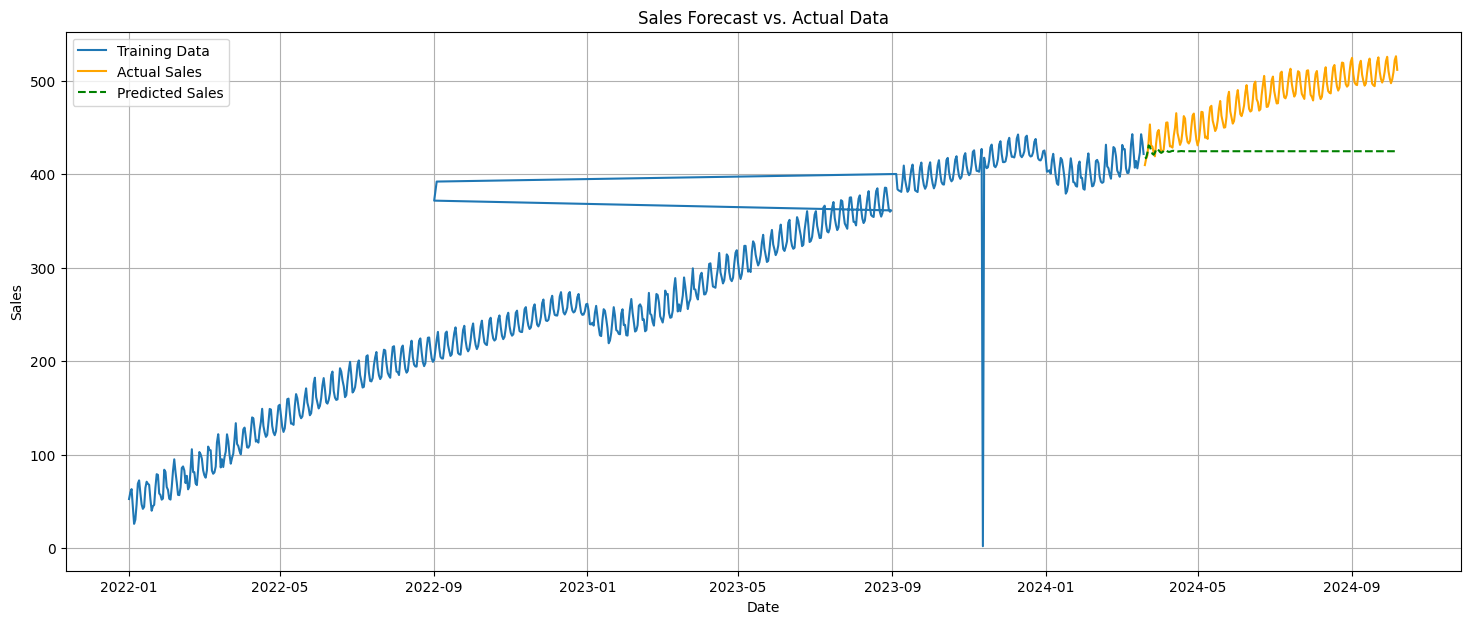


Training a final model on all data to forecast the future...
✅ Final model training complete!

Forecasting the next 30 days...
Displaying the future forecast visualization...


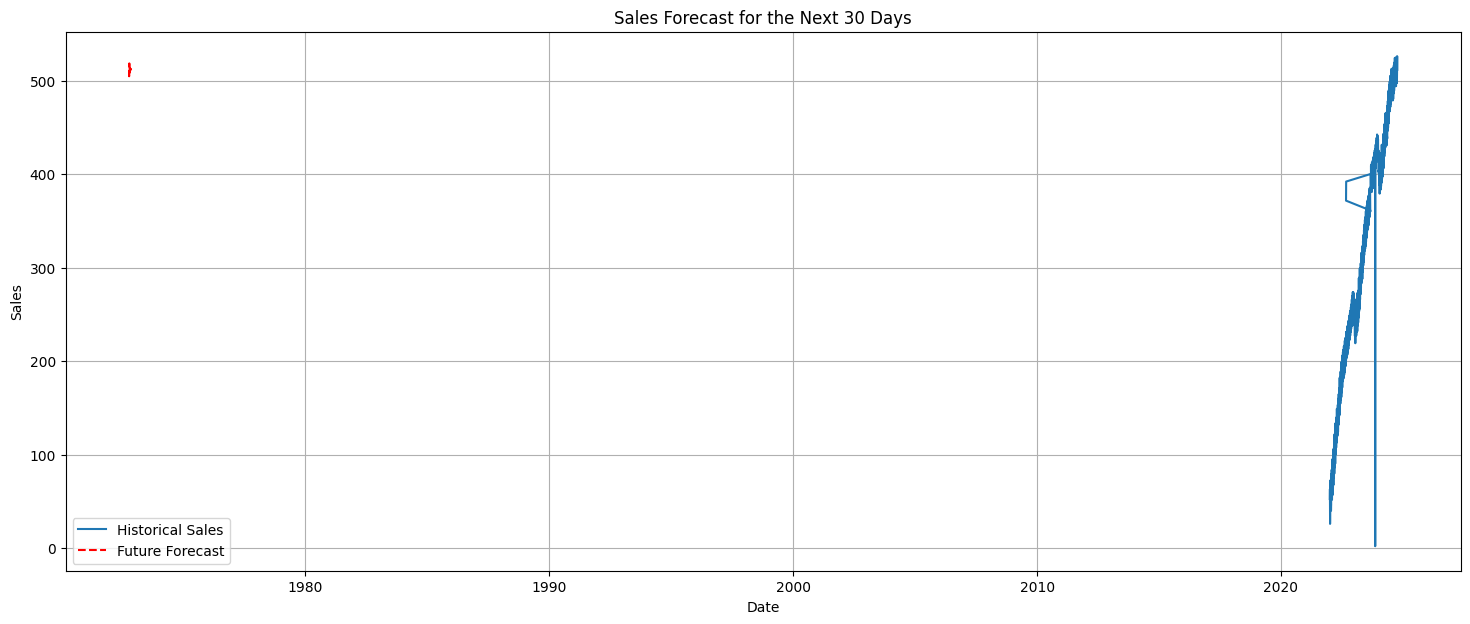


--- Process Complete ---


In [4]:
# ==============================================================================
# Step 1: Setup and Import Libraries
# ==============================================================================
# This script uses pandas for data manipulation, numpy for numerical operations,
# matplotlib for plotting, and statsmodels for time series analysis.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings

# Ignore harmless warnings from statsmodels
warnings.filterwarnings("ignore")

# ==============================================================================
# Step 2: Load and Prepare Your Dataset
# ==============================================================================
# INSTRUCTIONS:
# 1. On the left side of your Colab notebook, click the "Files" icon (folder).
# 2. Click the "Upload to session storage" button.
# 3. Select the CSV file you created with the 1000 sales data points.

try:
    # Load the dataset you uploaded
    df = pd.read_csv('your_sales_data.csv') # <-- Make sure the filename matches yours
    print("✅ Dataset loaded successfully!")
except FileNotFoundError:
    print("❌ Error: Could not find the sales data CSV file.")
    print("Please make sure you have uploaded the file and the filename is correct.")
    # Create a dummy dataframe to prevent the rest of the script from crashing
    df = pd.DataFrame({'Date': pd.to_datetime(['2022-01-01']), 'Sales': [0]})

# --- Data Preparation ---
# We need to prepare the data for time series forecasting. This involves:
# 1. Converting the 'Date' column to a proper datetime object.
# 2. Setting the 'Date' column as the index of our DataFrame.
# 3. Creating a final time series object containing only the sales data.

# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Our final time series data is the 'Sales' column
time_series_data = df['Sales']

# ==============================================================================
# Step 3: Visualize Your Sales Data
# ==============================================================================
# It's always a good idea to plot your data to visually inspect for trends,
# seasonality, or any unusual patterns.

print("\nDisplaying your sales data plot...")
plt.figure(figsize=(18, 7))
time_series_data.plot()
plt.title('Your Sales Data (1000 Days)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

# ==============================================================================
# Step 4: Split Data into Training and Testing Sets
# ==============================================================================
# To evaluate our model's performance, we'll train it on a portion of the
# data and test it on a portion it has never seen before.

# We'll use the first 80% of the data for training and the last 20% for testing.
split_point = int(len(time_series_data) * 0.8)
train_data = time_series_data[0:split_point]
test_data = time_series_data[split_point:]

print(f"\nData split into training and testing sets:")
print(f"Training data points: {len(train_data)}")
print(f"Testing data points: {len(test_data)}")

# ==============================================================================
# Step 5: Build and Train the ARIMA Model
# ==============================================================================
# We will use the ARIMA (AutoRegressive Integrated Moving Average) model, a
# powerful and popular model for time series forecasting.

# The 'order' parameter (p, d, q) is crucial for ARIMA.
# p: The number of lag observations to include (lag order).
# d: The number of times the raw observations are differenced (degree of differencing).
# q: The size of the moving average window (order of moving average).
# A common starting point that works well for many datasets is (5, 1, 0).

print("\nTraining the ARIMA model... (This may take a moment)")
arima_order = (5, 1, 0)
model = ARIMA(train_data, order=arima_order)
model_fit = model.fit()

print("✅ Model training complete!")
# You can uncomment the line below to see a detailed summary of the model
# print(model_fit.summary())

# ==============================================================================
# Step 6: Make Predictions on the Test Set
# ==============================================================================
# Now we use our trained model to forecast the sales for the test period.

print("\nMaking predictions on the test data...")
# The 'forecast' method predicts the number of steps into the future.
# We want to predict for the entire length of our test set.
predictions = model_fit.forecast(steps=len(test_data))

# ==============================================================================
# Step 7: Evaluate and Visualize the Forecast
# ==============================================================================
# This is the most important step: comparing our model's predictions to the
# actual sales data to see how well it performed.

print("\n--- Model Performance Evaluation ---")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(test_data, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test_data, predictions)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Calculate Mean Absolute Percentage Error (MAPE)
# To avoid division by zero, we'll filter out the time steps where actual sales were 0.
# Reindex predictions to match the test_data index for accurate calculation
predictions.index = test_data.index

non_zero_actuals = test_data[test_data > 0]
non_zero_predictions = predictions[test_data > 0]

if not non_zero_actuals.empty:
    mape = np.mean(np.abs((non_zero_actuals - non_zero_predictions) / non_zero_actuals)) * 100
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
else:
    print("MAPE cannot be calculated because all actual values in the test set are zero.")

print("------------------------------------")


# Visualize the forecast against the actual data
print("\nDisplaying the forecast visualization...")
plt.figure(figsize=(18, 7))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Actual Sales', color='orange')
plt.plot(test_data.index, predictions, label='Predicted Sales', color='green', linestyle='--')
plt.title('Sales Forecast vs. Actual Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

# ==============================================================================
# Step 8: Forecast the Future
# ==============================================================================
# Now, for the final and most practical step: let's train the model on ALL of
# your data and use it to forecast the *actual* future.

print("\nTraining a final model on all data to forecast the future...")
final_model = ARIMA(time_series_data, order=arima_order)
final_model_fit = final_model.fit()
print("✅ Final model training complete!")

# Forecast the next 30 days
future_forecast_steps = 30
future_forecast = final_model_fit.forecast(steps=future_forecast_steps)

print(f"\nForecasting the next {future_forecast_steps} days...")

# Visualize the historical data and the future forecast
print("Displaying the future forecast visualization...")
plt.figure(figsize=(18, 7))
plt.plot(time_series_data.index, time_series_data, label='Historical Sales')
plt.plot(future_forecast.index, future_forecast, label='Future Forecast', color='red', linestyle='--')
plt.title(f'Sales Forecast for the Next {future_forecast_steps} Days')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

print("\n--- Process Complete ---")